In [5]:
#Importing Libraries

import fcsparser as fcsp
import re
import os
import time
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.svm import SVC, SVR
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler, normalize, LabelEncoder, MinMaxScaler
from sklearn.model_selection import StratifiedKFold, GridSearchCV, ParameterGrid, train_test_split, RepeatedStratifiedKFold
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression, Lasso
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.cluster import KMeans
from sklearn.metrics import f1_score, accuracy_score, mean_squared_error, confusion_matrix
from sklearn.decomposition import PCA


import random

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [6]:
# Importing data

def load_data(dir):
    print('---- loading data ---->')
    data = {}
    for dirname, _, filename in os.walk(dir):
        for file in filename:
            path = os.path.join(dirname, file)
            # Slicing in order to remove .fcs from filename
            f_name = ''.join(list(file)[:-4])
            data[f_name] = pd.DataFrame(fcsp.parse(path, meta_data_only=False, reformat_meta=True)[1])
    return data, fcsp.parse(path, meta_data_only=False, reformat_meta=True)[0]['_channels_']
 

'''
for dirname, _, filename in os.walk(HERE):
    for file in filename:
      path = os.path.join()
        meta = fcsparser.parse(, meta_data_only=True, reformat_meta=True)
'''

def prepData(x,scaler=None):
        """
        Normalize data
        """
        if not scaler:
                scaler = StandardScaler().fit(x)
        x_transformed= np.nan_to_num(np.array(scaler.transform(x)))
        return normalize(x_transformed),scaler

# Loading fcs file data into a dictionary
global path

dir = os.path.abspath(os.path.dirname('C:\\Users\\ankit\\Downloads\\FCM Data\\FCM Data For Kartik - Copy\nc\\NCD1_1'))
dir = os.path.join(dir, 'C:\\Users\\ankit\\Downloads\\FCM Data\\FCM Data For Kartik - Copy\\nc')
data, channels = load_data(dir)

# Function to return list of different taken samples
def sample_list(det = data):
    return set([sample[0:3] for sample in det.keys()])


# Function to check the dimensions of our fcs files
def checkDimensions(data, dimensions):
    for sample in data:
        if data[sample].shape != dimensions: print(sample, data[sample].shape)
    return 



---- loading data ---->


In [7]:
data

{'NCD1_1':             FSC-A  FSC-H        SSC-A      FITC-A        PE-A   PE-Cy5-A  \
 0      406.399994  779.0   483.119995  -56.430000  103.950005 -15.840000   
 1      178.400009  842.0   661.320007   76.230003 -640.530029  30.690001   
 2      765.600037  833.0   716.760010  -66.330002  367.290009 -50.490002   
 3      581.600037  837.0   409.860016  -50.490002 -268.290009 -73.260002   
 4      896.799988  786.0   524.700012 -146.520004 -407.880005 -13.860001   
 ...           ...    ...          ...         ...         ...        ...   
 99995  119.200005  802.0   615.780029 -167.309998  139.589996  11.880000   
 99996  539.200012  722.0  1200.869995  -26.730000 -357.390015  35.639999   
 99997  316.000000  755.0   609.840027  106.919998 -385.110016 -28.710001   
 99998  380.800018  774.0   739.530029  -53.459999  -18.809999 -13.860001   
 99999  827.200012  741.0  1381.050049  -55.440002   91.080002  99.000000   
 
         PE-Cy7-A       APC-A   APC-Cy7-A  Pacific Blue-A    AmC

In [8]:
checkDimensions(data,data[random.choice(list(data.keys()))].shape)

In [9]:
#concatenating the dataframes of all triplicates -->
def triplicates_combined(data = data):
    deta = {}
    for key in data.keys():
        deta[key[:4]]= pd.concat([data[key[:4]+'_1'],data[key[:4]+'_2'],data[key[:4]+'_3']],axis=0)
    return deta

triplicates_combined()

{'NCD1':             FSC-A   FSC-H        SSC-A      FITC-A        PE-A     PE-Cy5-A  \
 0      406.399994   779.0   483.119995  -56.430000  103.950005   -15.840000   
 1      178.400009   842.0   661.320007   76.230003 -640.530029    30.690001   
 2      765.600037   833.0   716.760010  -66.330002  367.290009   -50.490002   
 3      581.600037   837.0   409.860016  -50.490002 -268.290009   -73.260002   
 4      896.799988   786.0   524.700012 -146.520004 -407.880005   -13.860001   
 ...           ...     ...          ...         ...         ...          ...   
 99995  518.400024  1019.0  1742.400024   28.710001 -703.890015  1368.180054   
 99996  523.200012   822.0   563.309998   47.520000 -806.850037    -8.910000   
 99997   63.200001   822.0  1098.900024  -17.820000  470.250000    60.389999   
 99998  278.399994   715.0   378.179993 -111.870003  292.049988    12.870000   
 99999  348.000000   928.0   521.729980  216.809998  157.410004    83.160004   
 
          PE-Cy7-A       APC-A

In [10]:
data.keys()

dict_keys(['NCD1_1', 'NCD1_2', 'NCD1_3', 'NCD2_1', 'NCD2_2', 'NCD2_3', 'NCD3_1', 'NCD3_2', 'NCD3_3', 'NCD4_1', 'NCD4_2', 'NCD4_3', 'NCD5_1', 'NCD5_2', 'NCD5_3'])

In [11]:
Day_1 = dict([(key,data[key]) for key in data.keys() if key.endswith('_1')])
Day_1.keys()

dict_keys(['NCD1_1', 'NCD2_1', 'NCD3_1', 'NCD4_1', 'NCD5_1'])

In [12]:
Day_1

{'NCD1_1':             FSC-A  FSC-H        SSC-A      FITC-A        PE-A   PE-Cy5-A  \
 0      406.399994  779.0   483.119995  -56.430000  103.950005 -15.840000   
 1      178.400009  842.0   661.320007   76.230003 -640.530029  30.690001   
 2      765.600037  833.0   716.760010  -66.330002  367.290009 -50.490002   
 3      581.600037  837.0   409.860016  -50.490002 -268.290009 -73.260002   
 4      896.799988  786.0   524.700012 -146.520004 -407.880005 -13.860001   
 ...           ...    ...          ...         ...         ...        ...   
 99995  119.200005  802.0   615.780029 -167.309998  139.589996  11.880000   
 99996  539.200012  722.0  1200.869995  -26.730000 -357.390015  35.639999   
 99997  316.000000  755.0   609.840027  106.919998 -385.110016 -28.710001   
 99998  380.800018  774.0   739.530029  -53.459999  -18.809999 -13.860001   
 99999  827.200012  741.0  1381.050049  -55.440002   91.080002  99.000000   
 
         PE-Cy7-A       APC-A   APC-Cy7-A  Pacific Blue-A    AmC

(1500000, 12)


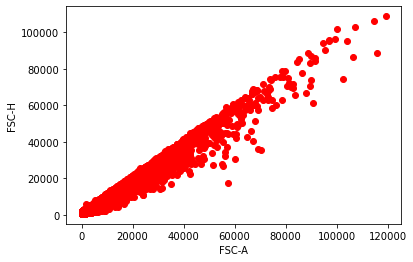

In [14]:
# function to plot combined data of all days(1-5) for a particular sample

def plot_sample(data, key):
    key = key[:3]
    original = pd.DataFrame()
    for day in range(1,6):
        l = pd.concat([data[key+str(day)+'_'+str(i)] for i in range(1,4)], axis = 0)
        original = pd.concat([original, l])
    plot = original
    print(plot.shape)
    plt.scatter(plot['FSC-A'],plot['FSC-H'], color = 'red')
    plt.xlabel('FSC-A')
    plt.ylabel('FSC-H')
    plt.show()

plot_sample(data,'NCD')

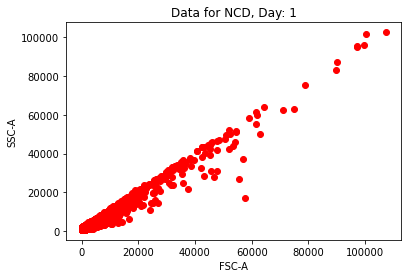

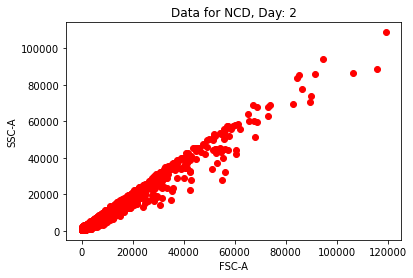

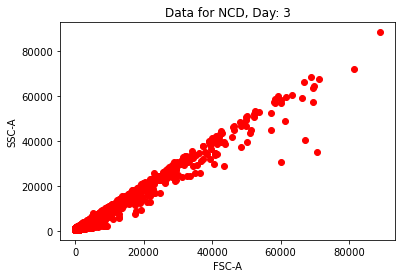

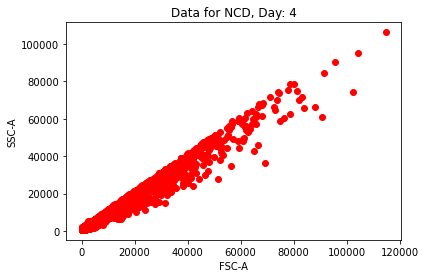

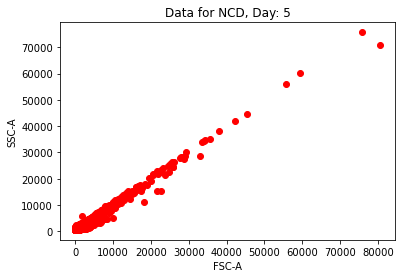

[None, None, None, None, None]

In [15]:
def plot_sample_data(data, key, day = 1):
    key = key[:3]
    plot = pd.concat([data[key+str(day)+'_'+str(i)] for i in range(1,4)])
    plt.scatter(plot['FSC-A'],plot['FSC-H'], color = 'red')
    plt.xlabel('FSC-A')
    plt.ylabel('SSC-A')
    plt.title(f'Data for {key}, Day: {day}')
    plt.show()
    

[plot_sample_data(data, 'NCD',i) for i in range(1,6)]

(1500000, 12)


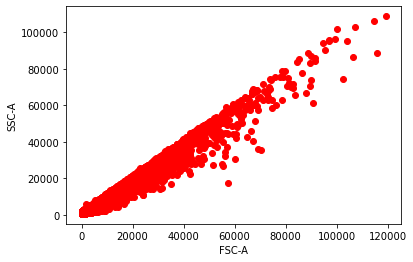

In [16]:
# function to plot combined data of all days(1-5) for a particular sample

def plot_sample(data, key):
    key = key[:3]
    original = pd.DataFrame()
    for day in range(1,6):
        l = pd.concat([data[key+str(day)+'_'+str(i)] for i in range(1,4)], axis = 0)
        original = pd.concat([original, l])
    plot = original
    print(plot.shape)
    plt.scatter(plot['FSC-A'],plot['FSC-H'], color = 'red')
    plt.xlabel('FSC-A')
    plt.ylabel('SSC-A')
    plt.show()

plot_sample(data,'NCD')

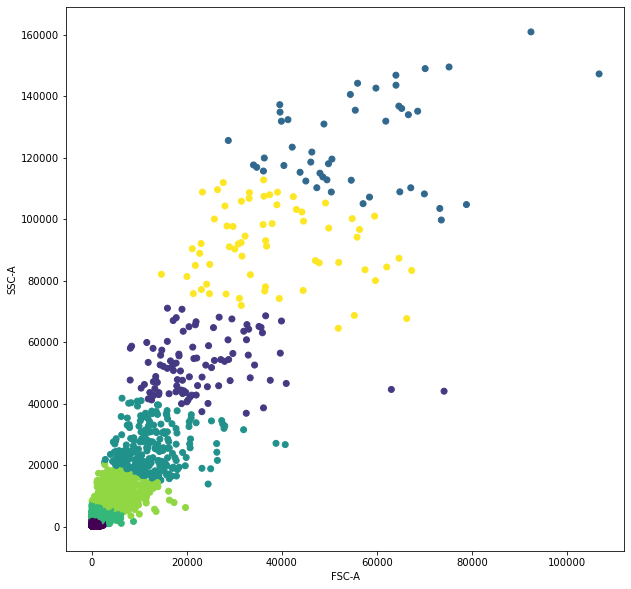

In [41]:
# Running Clustering with feature vector of size 3 in place of 3000 feature vector

num_clusters = 7
cols2 = random.choice(list(data.keys()))
sample = data[cols2][['FSC-A','SSC-A']]
kmean = KMeans(n_clusters = num_clusters).fit(sample)
kmean.predict(sample)
klabels = kmean.labels_

#filter rows of original data

cluster_count1 = np.zeros(num_clusters)
for cluster in range(num_clusters):
    filter_lb = sample[klabels == cluster]


fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(111)
ax.scatter(sample['FSC-A'],sample['SSC-A'],c = klabels) 
plt.xlabel("FSC-A")
plt.ylabel("SSC-A")

plt.show()


Cluster 1 Inertia 1926014173184.0
Cluster 2 Inertia 908920422400.0
Cluster 3 Inertia 585628581888.0
Cluster 4 Inertia 419172155392.0
Cluster 5 Inertia 346346061824.0
Cluster 6 Inertia 291787210752.0
Cluster 7 Inertia 242232229888.0
Cluster 8 Inertia 212761591808.0
Cluster 9 Inertia 185486049280.0
Cluster 10 Inertia 166517145600.0
Cluster 11 Inertia 154701774848.0
Cluster 12 Inertia 142867185664.0
Cluster 13 Inertia 131843039232.0
Cluster 14 Inertia 122029260800.0
Cluster 15 Inertia 114220163072.0
Cluster 16 Inertia 106089234432.0
Cluster 17 Inertia 98725257216.0
Cluster 18 Inertia 94172831744.0
Cluster 19 Inertia 88629575680.0


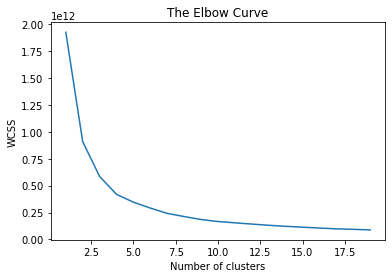

In [18]:
def elbow_curve(sample = sample):
    wcss = []
    for i in range(1,20):
      kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
      kmeans.fit(sample)
      wcss.append(kmeans.inertia_)
      print('Cluster', i, 'Inertia', kmeans.inertia_,)
    plt.plot(range(1,20),wcss)
 
    plt.title('The Elbow Curve')
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS') ##WCSS stands for total within-cluster sum of square
    plt.show()

elbow_curve()

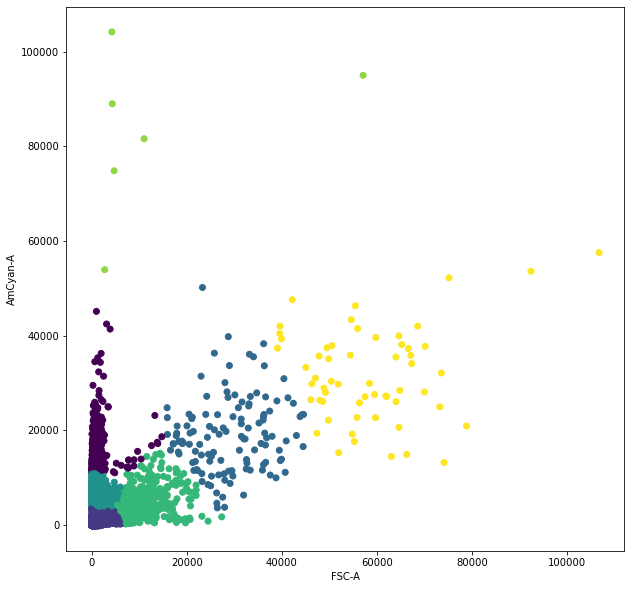

In [40]:
num_clusters = 7
cols2 = random.choice(list(data.keys()))
sample = data[cols2][['FSC-A','AmCyan-A']]
kmean = KMeans(n_clusters = num_clusters).fit(sample)
kmean.predict(sample)
klabels = kmean.labels_

#filter rows of original data

cluster_count1 = np.zeros(num_clusters)
for cluster in range(num_clusters):
    filter_lb = sample[klabels == cluster]


fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(111)
ax.scatter(sample['FSC-A'],sample['AmCyan-A'],c = klabels) 
plt.xlabel("FSC-A")
plt.ylabel("AmCyan-A")
plt.show()

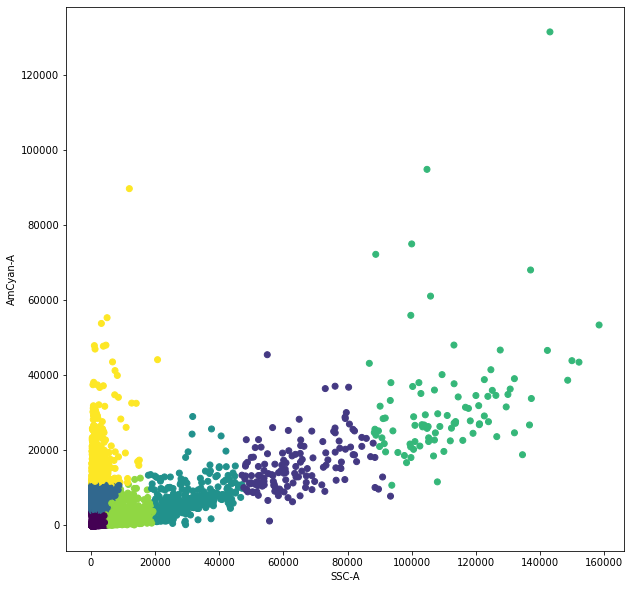

In [42]:
num_clusters = 7
cols2 = random.choice(list(data.keys()))
sample = data[cols2][['SSC-A','AmCyan-A']]
kmean = KMeans(n_clusters = num_clusters).fit(sample)
kmean.predict(sample)
klabels = kmean.labels_

#filter rows of original data

cluster_count1 = np.zeros(num_clusters)
for cluster in range(num_clusters):
    filter_lb = sample[klabels == cluster]


fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(111)
ax.scatter(sample['SSC-A'],sample['AmCyan-A'],c = klabels) 
plt.xlabel("SSC-A")
plt.ylabel("AmCyan-A")
plt.show()

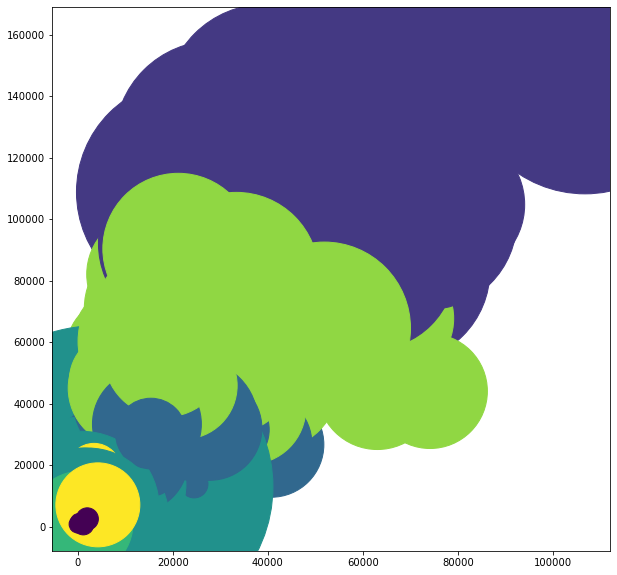

In [43]:
num_clusters = 7
cols2 = random.choice(list(data.keys()))
sample = data[cols2][['FSC-A','SSC-A','AmCyan-A']]
kmean = KMeans(n_clusters = num_clusters).fit(sample)
kmean.predict(sample)
klabels = kmean.labels_

#filter rows of original data

cluster_count1 = np.zeros(num_clusters)
for cluster in range(num_clusters):
    filter_lb = sample[klabels == cluster]


fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(111, )
ax.scatter(sample['FSC-A'],sample['SSC-A'],sample['AmCyan-A'],c = klabels) 

plt.show()

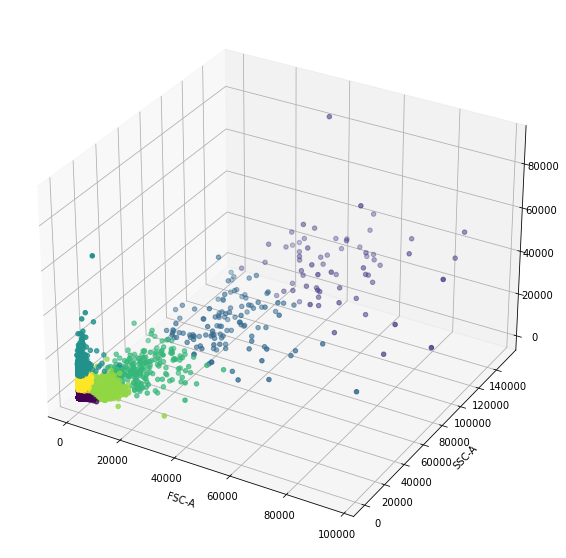

In [44]:
num_clusters = 7
cols2 = random.choice(list(data.keys()))
sample = data[cols2][['FSC-A','SSC-A','AmCyan-A']]
kmean = KMeans(n_clusters = num_clusters).fit(sample)
kmean.predict(sample)
klabels = kmean.labels_

#filter rows of original data

cluster_count1 = np.zeros(num_clusters)
for cluster in range(num_clusters):
    filter_lb = sample[klabels == cluster]


fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(111, projection='3d' )
ax.scatter(sample['FSC-A'],sample['SSC-A'],sample['AmCyan-A'],c = klabels) 
plt.xlabel("FSC-A", )
plt.ylabel("SSC-A",)

plt.show()